## Testing the Developed USGS_LIDAR Package

### Importing necessary library and developed packages

In [30]:
import geopandas as gpd
from shapely.geometry import Polygon
import pdal

from usgs_lidar_package import GetData
from IPython.display import Markdown, display, Image


In [2]:
fetcher = GetData(epsg=4326, metadata_filename="usgs3dep_region_data")
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]

polygon = Polygon(((MINX, MINY), (MINX, MAXY),
                 (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
# print(polygon)
fetch = fetcher.get_data(polygon, ["IA_FullState"])

POLYGON((-10436887.43333523 5148706.389047224, -10436887.43333523 5149217.145836507, -10435905.484106943 5149217.145836507, -10435905.484106943 5148706.389047224, -10436887.43333523 5148706.389047224))
Successfully read pipeline json file


In [3]:
geo_data_dict = fetch[0]['geo_data']
print(geo_data_dict)

        elevation                    geometry
0          317.59  POINT (-93.74864 41.92142)
1          317.42  POINT (-93.74863 41.92142)
2          317.27  POINT (-93.74862 41.92142)
3          317.28  POINT (-93.74865 41.92142)
4          317.25  POINT (-93.74867 41.92142)
...           ...                         ...
401572     317.41  POINT (-93.74802 41.92034)
401573     317.13  POINT (-93.74761 41.92063)
401574     317.37  POINT (-93.74841 41.92063)
401575     317.53  POINT (-93.74763 41.92122)
401576     317.57  POINT (-93.74802 41.92122)

[401577 rows x 2 columns]


In [4]:
df = gpd.GeoDataFrame(columns=["elevation", "geometry"])
df['elevation'] = geo_data_dict.elevation
df['geometry'] = geo_data_dict.geometry
df = df.set_geometry("geometry")
# df.set_crs(epsg=self.output_epsg, inplace=True)
df.head()

,elevation,geometry
0,317.59,POINT (-93.74864 41.92142)
1,317.42,POINT (-93.74863 41.92142)
2,317.27,POINT (-93.74862 41.92142)
3,317.28,POINT (-93.74865 41.92142)
4,317.25,POINT (-93.74867 41.92142)


#### The Output geo-dataframe is as shown above.

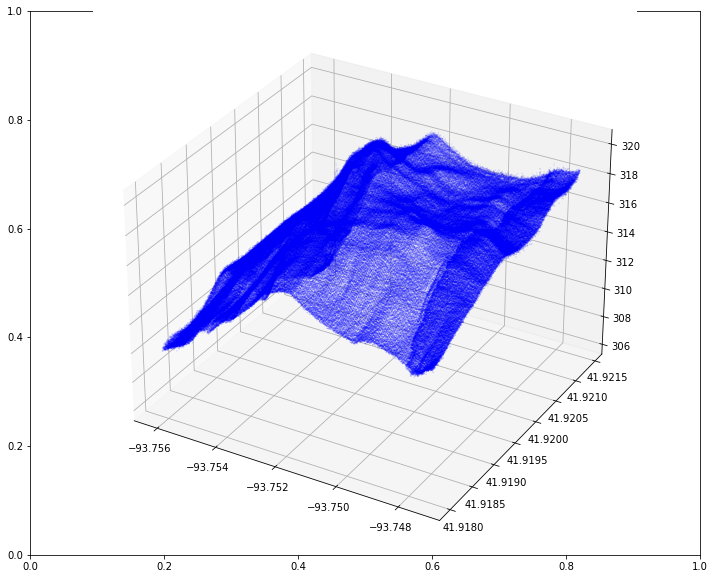

In [32]:
df
GetData.visualization_3D(self=GetData, df=df)